## Import all the libraries

In [1]:
import numpy as np
import dask
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import glob as glob
import time
from dask.diagnostics import ProgressBar
from datetime import date
import json
import os
import warnings
import seawater
import re

warnings.filterwarnings('ignore')


## Parameters

In [2]:
    import parameters_profiles_compare_1000m as param
    diren4=param.diren4
    config=param.config
    case=param.case
    member=param.member
    dirmod=param.dirmod
    meshfile=param.meshfile
    batfile=param.batfile
    ymin=param.ymin;mmin=param.mmin;dmin=param.dmin
    ymax=param.ymax;mmax=param.mmax;dmax=param.dmax
    depthmin=param.depthmin
    radius_max=param.radius_max
    period=param.period
    number_of_model_profiles=param.number_of_model_profiles
    plotdir=param.plotdir
    jsondir=param.jsondir
    dmap=param.dmap


In [3]:
datemin=datetime.date(ymin,mmin,dmin)
datemax=datetime.date(ymax,mmax,dmax)
jsonfile='txt/MEDWEST60-BLBT02_'+str(datemin)+'-'+str(datemax)+'_'+str(depthmin)+'m_'+str(radius_max)+'x'+str(period)+'d_'+str(number_of_model_profiles)+'.json'

## Read the jsonfile

In [4]:
sourcefile=open(jsonfile,'rU')
infos=json.load(sourcefile)
nb_profilesEN4=len(infos)


In [5]:
vert_standart=np.array([0,2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,
                   110,120,130,140,150,160,170,180,190,200,220,240,260,280,300,320,340,360,380,400,
                   420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,
                   820,840,860,880,900,920,940,960,980,1000,1050,1100,1150,1200,1250,1300,1350,1400,
                   1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000])
indz=np.where(vert_standart>depthmin)
vert_standart_red=vert_standart[0:np.min(indz[0])-1]

all_temp_mean_model=np.zeros((nb_profilesEN4,len(vert_standart_red)))
all_salt_mean_model=np.zeros((nb_profilesEN4,len(vert_standart_red)))
all_temp_en4=np.zeros((nb_profilesEN4,len(vert_standart_red)))
all_salt_en4=np.zeros((nb_profilesEN4,len(vert_standart_red)))
all_temp_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart_red)))
all_salt_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart_red)))
all_temp_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart_red)))
all_salt_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart_red)))


In [6]:
for prof in np.arange(nb_profilesEN4):
    list_profiles = infos.keys()
    reference =  str(list(list_profiles)[prof])
    print('Processing profile ', reference)
    # Open the netcdf file
    match=re.search(r'([\w.-]+).nc([\w.-]+)', reference)
    debut_ref=match.group(1)
    fin_ref=match.group(2)
    diren4="/gpfswork/rech/egi/rote001/EN4/"
    dirname=diren4+'profiles_files/MEDWEST60-BLBT02/'
    outname=dirname+str(debut_ref)+str(fin_ref)+'_MEDWEST60-BLBT02_1000m_TS.nc'
    dsprof=xr.open_dataset(outname)

    depth_en4=dsprof['depth_en4']
    temp_en4=dsprof['temp_profileEN4']
    salt_en4=dsprof['salt_profileEN4']
    mean_temp_model=dsprof['mean_temp_model']
    mean_salt_model=dsprof['mean_salt_model']
    percent10_temp_model=dsprof['percent10_temp_model']
    percent10_salt_model=dsprof['percent10_salt_model']
    percent90_temp_model=dsprof['percent90_temp_model']
    percent90_salt_model=dsprof['percent90_salt_model']
    obs_lat=dsprof['latitude_profileEN4']
    obs_lon=dsprof['longitude_profileEN4']
    obs_time=dsprof['time_profileEN4']
    
    # Project the profile to standart vertical levels
    temp_en4_standart=np.interp(vert_standart_red,depth_en4,temp_en4)
    salt_en4_standart=np.interp(vert_standart_red,depth_en4,salt_en4)
    mean_temp_model_standart=np.interp(vert_standart_red,depth_en4,mean_temp_model)
    mean_salt_model_standart=np.interp(vert_standart_red,depth_en4,mean_salt_model)
    percent10_temp_model_standart=np.interp(vert_standart_red,depth_en4,percent10_temp_model)
    percent10_salt_model_standart=np.interp(vert_standart_red,depth_en4,percent10_salt_model)
    percent90_temp_model_standart=np.interp(vert_standart_red,depth_en4,percent90_temp_model)
    percent90_salt_model_standart=np.interp(vert_standart_red,depth_en4,percent90_salt_model)

    #Fill the all profiles
    all_temp_mean_model[prof,:]=mean_temp_model_standart[:]
    all_salt_mean_model[prof,:]=mean_salt_model_standart[:]
    all_temp_en4[prof,:]=temp_en4_standart[:]
    all_salt_en4[prof,:]=salt_en4_standart[:]
    all_temp_percent10_model[prof,:]=percent10_temp_model_standart[:]
    all_salt_percent10_model[prof,:]=percent10_salt_model_standart[:]
    all_temp_percent90_model[prof,:]=percent90_temp_model_standart[:]
    all_salt_percent90_model[prof,:]=percent90_salt_model_standart[:]


Processing profile  Profile_20100106_prof.nc_71
Processing profile  Profile_20100106_prof.nc_76
Processing profile  Profile_20100108_prof.nc_90
Processing profile  Profile_20100108_prof.nc_92
Processing profile  Profile_20100109_prof.nc_0
Processing profile  Profile_20100110_prof.nc_0
Processing profile  Profile_20100113_prof.nc_69
Processing profile  Profile_20100115_prof.nc_0
Processing profile  Profile_20100116_prof.nc_79
Processing profile  Profile_20100118_prof.nc_85
Processing profile  Profile_20100118_prof.nc_88
Processing profile  Profile_20100119_prof.nc_1
Processing profile  Profile_20100120_prof.nc_0
Processing profile  Profile_20100123_prof.nc_72
Processing profile  Profile_20100125_prof.nc_1
Processing profile  Profile_20100126_prof.nc_69
Processing profile  Profile_20100128_prof.nc_92
Processing profile  Profile_20100128_prof.nc_94
Processing profile  Profile_20100129_prof.nc_0
Processing profile  Profile_20100131_prof.nc_83
Processing profile  Profile_20100202_prof.nc_70

In [7]:
mean_all_temp_mean_model=np.mean(all_temp_mean_model,axis=0)
mean_all_salt_mean_model=np.mean(all_salt_mean_model,axis=0)
mean_all_temp_en4=np.mean(all_temp_en4,axis=0)
mean_all_salt_en4=np.mean(all_salt_en4,axis=0)
mean_all_temp_percent10_model=np.mean(all_temp_percent10_model,axis=0)
mean_all_salt_percent10_model=np.mean(all_salt_percent10_model,axis=0)
mean_all_temp_percent90_model=np.mean(all_temp_percent90_model,axis=0)
mean_all_salt_percent90_model=np.mean(all_salt_percent90_model,axis=0)


In [8]:
min_temp=np.nanmin([np.nanmin(mean_all_temp_mean_model),
                 np.nanmin(mean_all_temp_en4),
                 np.nanmin(mean_all_temp_percent10_model),
                 np.nanmin(mean_all_temp_percent90_model)])
max_temp=np.nanmax([np.nanmax(mean_all_temp_mean_model),
                 np.nanmax(mean_all_temp_en4),
                 np.nanmax(mean_all_temp_percent10_model),
                 np.nanmax(mean_all_temp_percent90_model)])
min_salt=np.nanmin([np.nanmin(mean_all_salt_mean_model),
                 np.nanmin(mean_all_salt_en4),
                 np.nanmin(mean_all_salt_percent10_model),
                 np.nanmin(mean_all_salt_percent90_model)])
max_salt=np.nanmax([np.nanmax(mean_all_salt_mean_model),
                 np.nanmax(mean_all_salt_en4),
                 np.nanmax(mean_all_salt_percent10_model),
                 np.nanmax(mean_all_salt_percent90_model)])
print(min_temp,max_temp,min_salt,max_salt)



13.036381326818463 15.173276746543594 37.73936191238032 38.53277923625291


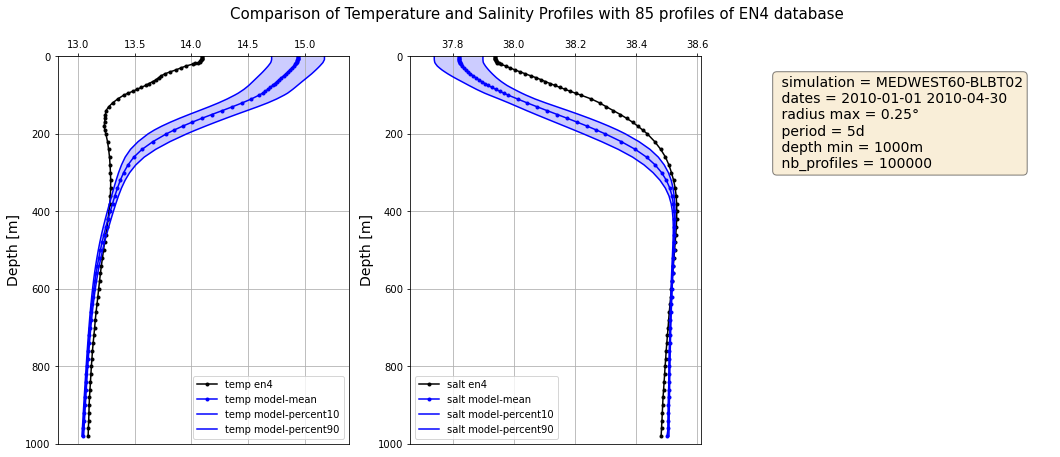

In [9]:
fig, axs = plt.subplots(1,3, figsize=(15, 6))
axs = axs.ravel()
title = 'Comparison of Temperature and Salinity Profiles with '+str(nb_profilesEN4)+' profiles of EN4 database'
plt.suptitle(title,size = 15,y=1.05)
axs[0].plot(mean_all_temp_en4,vert_standart_red,'k.-', label='temp en4')
axs[0].plot(mean_all_temp_mean_model,vert_standart_red,'b.-', label='temp model-mean')
axs[0].set_ylabel('Depth [m]', size=14)
axs[0].set_xlim(left=min_temp-(max_temp-min_temp)/10,right=max_temp+(max_temp-min_temp)/10)
axs[0].set_ylim(depthmin, 0)
axs[0].grid(True, which='both')
axs[0].xaxis.tick_top()
axs[0].xaxis.set_label_position('top') 
axs[0].plot(mean_all_temp_percent10_model,vert_standart_red,'b-', label='temp model-percent10')
axs[0].plot(mean_all_temp_percent90_model,vert_standart_red,'b-', label='temp model-percent90')
axs[0].fill_betweenx(vert_standart_red, mean_all_temp_percent10_model, x2=mean_all_temp_percent90_model, alpha=0.2, facecolor='b')
#        axs[0].set_title('Temperature profiles')
axs[0].legend()
        
axs[1].plot(mean_all_salt_en4,vert_standart_red,'k.-', label='salt en4')
axs[1].plot(mean_all_salt_mean_model,vert_standart_red,'b.-', label='salt model-mean')
axs[1].set_ylabel('Depth [m]', size=14)
axs[1].set_xlim(left=min_salt-(max_salt-min_salt)/10,right=max_salt+(max_salt-min_salt)/10)
axs[1].set_ylim(depthmin, 0)
axs[1].grid(True, which='both')
axs[1].xaxis.tick_top()
axs[1].xaxis.set_label_position('top') 
axs[1].plot(mean_all_salt_percent10_model,vert_standart_red,'b-', label='salt model-percent10')
axs[1].plot(mean_all_salt_percent90_model,vert_standart_red,'b-', label='salt model-percent90')
axs[1].fill_betweenx(vert_standart_red, mean_all_salt_percent10_model, x2=mean_all_salt_percent90_model, alpha=0.2, facecolor='b')
#        axs[1].set_title('Salinity profiles')
axs[1].legend()

textstr = '\n'.join((
            ' simulation = MEDWEST60-BLBT02',
            ' dates = '+str(datemin)+' '+str(datemax),
            ' radius max = '+str(radius_max)+'°',
            ' period = '+str(period)+'d',
            ' depth min = '+str(depthmin)+'m',
            ' nb_profiles = '+str(number_of_model_profiles)))        
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs[2].text(0.05, 0.95, textstr, transform=axs[2].transAxes, fontsize=14,verticalalignment='top', bbox=props)
axs[2].axis('off')
fig.tight_layout()
plt.savefig('plots/profiles-TS-MEDWEST60-BLBT02_'+str(datemin)+'-'+str(datemax)+'_'+str(depthmin)+'m_'+str(radius_max)+'x'+str(period)+'d_'+str(number_of_model_profiles)+'.png',bbox_inches='tight')
